# Optimization of Image Classification for CIFAR-10 dataset

* Defined a CNN for classification of CIFAR-10 dataset
* Compared with or without data augmentation result
* Compared 2 different optimization algorithms - sgd and adam
* Compared 3 loss functions - cross-entropy, hinge loss, hinge squared loss

## Import Modules

In [1]:
# If using tensorflow, set image dimensions order
from keras import backend as K
if K.backend()=='tensorflow':
    K.set_image_dim_ordering("th")

Using TensorFlow backend.


In [2]:
import time
import matplotlib.pyplot as plt
import numpy as np
% matplotlib inline
np.random.seed(2017) 
from keras.models import Sequential
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from keras.layers import Activation, Flatten, Dense, Dropout
from keras.layers.normalization import BatchNormalization
from keras.utils import np_utils

## Load CIFAR10 Dataset

In [3]:
from keras.datasets import cifar10
(train_features, train_labels), (test_features, test_labels) = cifar10.load_data()
num_train, img_channels, img_rows, img_cols =  train_features.shape
num_test, _, _, _ =  test_features.shape
num_classes = len(np.unique(train_labels))

## Show Examples from Each Class

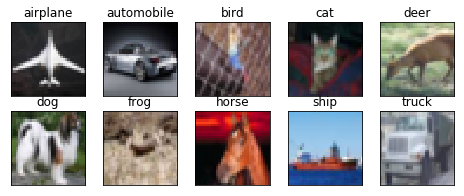

In [4]:
class_names = ['airplane','automobile','bird','cat','deer',
               'dog','frog','horse','ship','truck']
fig = plt.figure(figsize=(8,3))
for i in range(num_classes):
    ax = fig.add_subplot(2, 5, 1 + i, xticks=[], yticks=[])
    idx = np.where(train_labels[:]==i)[0]
    features_idx = train_features[idx,::]
    img_num = np.random.randint(features_idx.shape[0])
    im = np.transpose(features_idx[img_num,::], (1, 2, 0))
    ax.set_title(class_names[i])
    plt.imshow(im)
plt.show()

## Data pre-processing

In [5]:
train_features = train_features.astype('float32')/255
test_features = test_features.astype('float32')/255
# convert class labels to binary class labels
train_labels = np_utils.to_categorical(train_labels, num_classes)
test_labels = np_utils.to_categorical(test_labels, num_classes)

## Function to plot model accuracy and loss 

In [6]:
def plot_model_history(model_history):
    fig, axs = plt.subplots(1,2,figsize=(15,5))
    # summarize history for accuracy
    axs[0].plot(range(1,len(model_history.history['acc'])+1),model_history.history['acc'])
    axs[0].plot(range(1,len(model_history.history['val_acc'])+1),model_history.history['val_acc'])
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy')
    axs[0].set_xlabel('Epoch')
    axs[0].set_xticks(np.arange(1,len(model_history.history['acc'])+1),len(model_history.history['acc'])/10)
    axs[0].legend(['train', 'val'], loc='best')
    # summarize history for loss
    axs[1].plot(range(1,len(model_history.history['loss'])+1),model_history.history['loss'])
    axs[1].plot(range(1,len(model_history.history['val_loss'])+1),model_history.history['val_loss'])
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss')
    axs[1].set_xlabel('Epoch')
    axs[1].set_xticks(np.arange(1,len(model_history.history['loss'])+1),len(model_history.history['loss'])/10)
    axs[1].legend(['train', 'val'], loc='best')
    plt.show()

## Funtion to compute test accuracy

In [7]:
def accuracy(test_x, test_y, model):
    result = model.predict(test_x)
    predicted_class = np.argmax(result, axis=1)
    true_class = np.argmax(test_y, axis=1)
    num_correct = np.sum(predicted_class == true_class) 
    accuracy = float(num_correct)/result.shape[0]
    return (accuracy * 100)

## Convolutional Neural Network for CIFAR-10 dataset

In [8]:
def cnn():
    # Define the model
    model = Sequential()

    model.add(Convolution2D(48, 3, 3, border_mode='same', input_shape=(3, 32, 32)))
    model.add(Activation('relu'))
    model.add(Convolution2D(48, 3, 3))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    model.add(Convolution2D(96, 3, 3, border_mode='same'))
    model.add(Activation('relu'))
    model.add(Convolution2D(96, 3, 3))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    model.add(Convolution2D(192, 3, 3, border_mode='same'))
    model.add(Activation('relu'))
    model.add(Convolution2D(192, 3, 3))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    model.add(Flatten())
    model.add(Dense(512))
    model.add(Activation('relu'))
    model.add(Dropout(0.5))
    model.add(Dense(256))
    model.add(Activation('relu'))
    model.add(Dropout(0.5))
    model.add(Dense(num_classes, activation='softmax'))
    return model

## Use Adam optimization algorithm on original data

Train on 50000 samples, validate on 10000 samples
Epoch 1/100
50000/50000 [==============================] - 55s - loss: 1.8776 - acc: 0.2712 - val_loss: 1.5034 - val_acc: 0.4539
Epoch 2/100
50000/50000 [==============================] - 55s - loss: 1.3669 - acc: 0.4987 - val_loss: 1.1428 - val_acc: 0.5849
Epoch 3/100
50000/50000 [==============================] - 55s - loss: 1.1398 - acc: 0.5951 - val_loss: 1.0141 - val_acc: 0.6403
Epoch 4/100
50000/50000 [==============================] - 55s - loss: 0.9781 - acc: 0.6568 - val_loss: 0.9476 - val_acc: 0.6723
Epoch 5/100
50000/50000 [==============================] - 55s - loss: 0.8716 - acc: 0.6963 - val_loss: 0.7935 - val_acc: 0.7283
Epoch 6/100
50000/50000 [==============================] - 55s - loss: 0.8005 - acc: 0.7244 - val_loss: 0.7491 - val_acc: 0.7422
Epoch 7/100
50000/50000 [==============================] - 55s - loss: 0.7451 - acc: 0.7463 - val_loss: 0.6712 - val_acc: 0.7681
Epoch 8/100
50000/50000 [======================

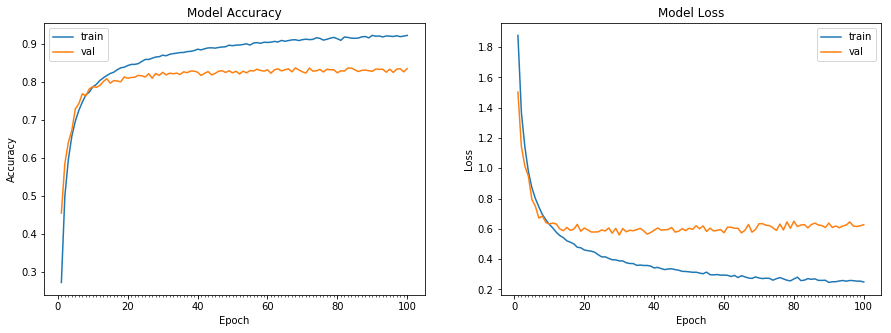

Model took 5536.95 seconds to train
Accuracy on test data is: 83.45


In [10]:
model = cnn()
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
# Train the model
start = time.time()
model_info = model.fit(train_features, train_labels, 
                       batch_size=128, nb_epoch=100, 
                       validation_data = (test_features, test_labels), 
                       verbose=1)
end = time.time()
# plot model history
plot_model_history(model_info)
print ("Model took %0.2f seconds to train"%(end - start))
# compute test accuracy
print ("Accuracy on test data is: %0.2f"%accuracy(test_features, test_labels, model))

In [12]:
model.summary()

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
convolution2d_7 (Convolution2D)  (None, 48, 32, 32)    1344        convolution2d_input_2[0][0]      
____________________________________________________________________________________________________
activation_9 (Activation)        (None, 48, 32, 32)    0           convolution2d_7[0][0]            
____________________________________________________________________________________________________
convolution2d_8 (Convolution2D)  (None, 48, 30, 30)    20784       activation_9[0][0]               
____________________________________________________________________________________________________
activation_10 (Activation)       (None, 48, 30, 30)    0           convolution2d_8[0][0]            
___________________________________________________________________________________________

## Add Data Augmentation and used Adam optimization algorithm

In [59]:
from keras.pcreprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=0,  # randomly rotate images in the range (degrees, 0 to 180)
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=True,  # randomly flip images
        vertical_flip=False)  # randomly flip images

Epoch 1/100
50000/50000 [==============================] - 56s - loss: 0.6300 - acc: 0.8047 - val_loss: 0.5149 - val_acc: 0.8324
Epoch 2/100
50000/50000 [==============================] - 55s - loss: 0.6208 - acc: 0.8055 - val_loss: 0.5133 - val_acc: 0.8360
Epoch 3/100
50000/50000 [==============================] - 55s - loss: 0.6091 - acc: 0.8089 - val_loss: 0.5206 - val_acc: 0.8356
Epoch 4/100
50000/50000 [==============================] - 55s - loss: 0.5981 - acc: 0.8104 - val_loss: 0.5033 - val_acc: 0.8372
Epoch 5/100
50000/50000 [==============================] - 55s - loss: 0.5989 - acc: 0.8102 - val_loss: 0.5208 - val_acc: 0.8355
Epoch 6/100
50000/50000 [==============================] - 55s - loss: 0.5928 - acc: 0.8137 - val_loss: 0.5173 - val_acc: 0.8338
Epoch 7/100
50000/50000 [==============================] - 55s - loss: 0.5861 - acc: 0.8145 - val_loss: 0.5178 - val_acc: 0.8342
Epoch 8/100
50000/50000 [==============================] - 55s - loss: 0.5903 - acc: 0.8146 - val

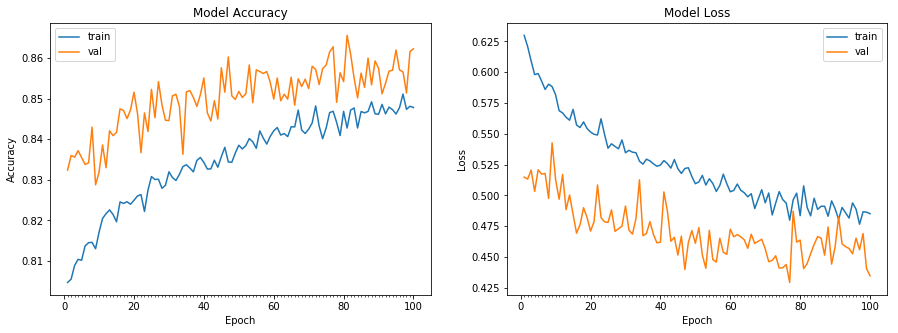

Accuracy on test data is: 86.23


In [18]:
# train the model
start = time.time()
# Train the model
model_info = model.fit_generator(datagen.flow(train_features, train_labels, batch_size = 128),
                                 samples_per_epoch = train_features.shape[0], nb_epoch = 100, 
                                 validation_data = (test_features, test_labels), verbose=1)
end = time.time()
print ("Model took %0.2f seconds to train"%(end - start))
# plot model history
plot_model_history(model_info)
# compute test accuracy
print ("Accuracy on test data is: %0.2f"%accuracy(test_features, test_labels, model))

## Use SDG optimization algorithm and cross-entropy loss on augmented data

Epoch 1/100
50000/50000 [==============================] - 56s - loss: 2.1728 - acc: 0.1660 - val_loss: 1.9239 - val_acc: 0.2535
Epoch 2/100
50000/50000 [==============================] - 55s - loss: 1.8688 - acc: 0.2676 - val_loss: 1.6746 - val_acc: 0.3808
Epoch 3/100
50000/50000 [==============================] - 55s - loss: 1.6294 - acc: 0.3855 - val_loss: 1.3958 - val_acc: 0.4790
Epoch 4/100
50000/50000 [==============================] - 55s - loss: 1.4477 - acc: 0.4678 - val_loss: 1.2594 - val_acc: 0.5344
Epoch 5/100
50000/50000 [==============================] - 55s - loss: 1.3118 - acc: 0.5254 - val_loss: 1.1058 - val_acc: 0.5932
Epoch 6/100
50000/50000 [==============================] - 54s - loss: 1.2020 - acc: 0.5708 - val_loss: 1.0165 - val_acc: 0.6374
Epoch 7/100
50000/50000 [==============================] - 55s - loss: 1.1203 - acc: 0.6014 - val_loss: 0.9643 - val_acc: 0.6569
Epoch 8/100
50000/50000 [==============================] - 55s - loss: 1.0416 - acc: 0.6302 - val

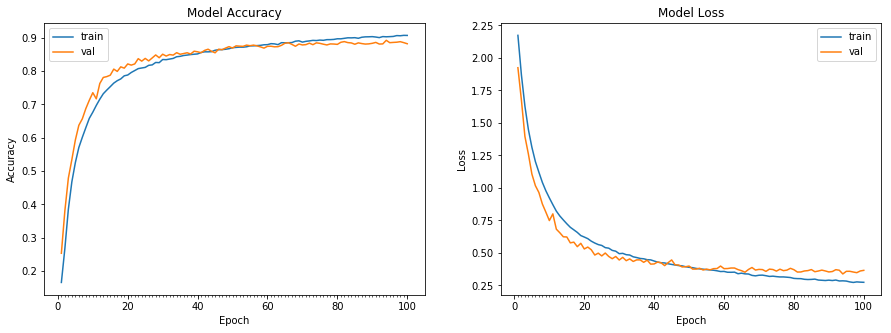

Model took 5503.64 seconds to train
Accuracy on test data is: 88.21


In [60]:
# Define the model
model = cnn()
sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
# Compile the model
model.compile(optimizer=sgd, loss='categorical_crossentropy', metrics=['accuracy'])
# Train the model
start = time.time()
model_info = model.fit_generator(datagen.flow(train_features, train_labels, batch_size = 128),
                                 samples_per_epoch = train_features.shape[0], nb_epoch = 100, 
                                 validation_data = (test_features, test_labels), verbose=1)
end = time.time()
# plot model history
plot_model_history(model_info)
print ("Model took %0.2f seconds to train"%(end - start))
# compute test accuracy
print ("Accuracy on test data is: %0.2f"%accuracy(test_features, test_labels, model))

# Use squared hinge loss function and Adam on augmented data

Epoch 1/100
50000/50000 [==============================] - 56s - loss: 0.9666 - acc: 0.2510 - val_loss: 0.9532 - val_acc: 0.3999
Epoch 2/100
50000/50000 [==============================] - 55s - loss: 0.9507 - acc: 0.4154 - val_loss: 0.9444 - val_acc: 0.4781
Epoch 3/100
50000/50000 [==============================] - 55s - loss: 0.9438 - acc: 0.4922 - val_loss: 0.9387 - val_acc: 0.5499
Epoch 4/100
50000/50000 [==============================] - 55s - loss: 0.9395 - acc: 0.5433 - val_loss: 0.9355 - val_acc: 0.5904
Epoch 5/100
50000/50000 [==============================] - 55s - loss: 0.9365 - acc: 0.5775 - val_loss: 0.9306 - val_acc: 0.6427
Epoch 6/100
50000/50000 [==============================] - 55s - loss: 0.9345 - acc: 0.6014 - val_loss: 0.9315 - val_acc: 0.6376
Epoch 7/100
50000/50000 [==============================] - 55s - loss: 0.9326 - acc: 0.6251 - val_loss: 0.9294 - val_acc: 0.6569
Epoch 8/100
50000/50000 [==============================] - 55s - loss: 0.9309 - acc: 0.6437 - val

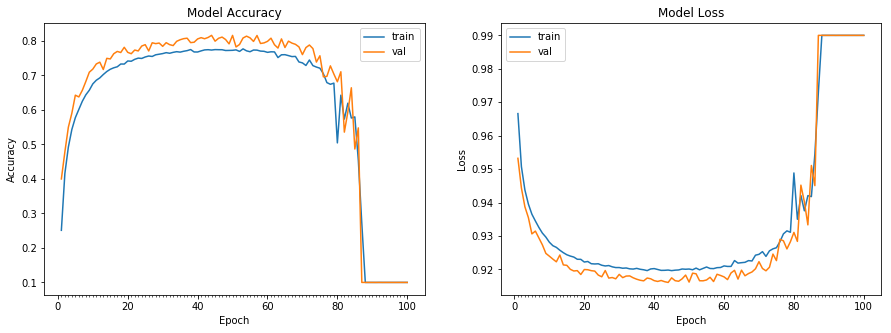

Accuracy on test data is: 10.00


In [61]:
model = cnn()
model.compile(optimizer='adam', loss='squared_hinge', metrics=['accuracy'])
# train the model
start = time.time()
# Train the model
model_info = model.fit_generator(datagen.flow(train_features, train_labels, batch_size = 128),
                                 samples_per_epoch = train_features.shape[0], nb_epoch = 100, 
                                 validation_data = (test_features, test_labels), verbose=1)
end = time.time()
print ("Model took %0.2f seconds to train"%(end - start))
# plot model history
plot_model_history(model_info)
# compute test accuracy
print ("Accuracy on test data is: %0.2f"%accuracy(test_features, test_labels, model))

## Use hinge loss function and Adam on augmented data

Epoch 1/100
50000/50000 [==============================] - 56s - loss: 0.9891 - acc: 0.1090 - val_loss: 0.9900 - val_acc: 0.1000
Epoch 2/100
50000/50000 [==============================] - 55s - loss: 0.9900 - acc: 0.1000 - val_loss: 0.9900 - val_acc: 0.1000
Epoch 3/100
50000/50000 [==============================] - 55s - loss: 0.9900 - acc: 0.1000 - val_loss: 0.9900 - val_acc: 0.1000
Epoch 4/100
50000/50000 [==============================] - 55s - loss: 0.9900 - acc: 0.1000 - val_loss: 0.9900 - val_acc: 0.1000
Epoch 5/100
50000/50000 [==============================] - 55s - loss: 0.9900 - acc: 0.1000 - val_loss: 0.9900 - val_acc: 0.1000
Epoch 6/100
50000/50000 [==============================] - 55s - loss: 0.9900 - acc: 0.1000 - val_loss: 0.9900 - val_acc: 0.1000
Epoch 7/100
50000/50000 [==============================] - 56s - loss: 0.9900 - acc: 0.1000 - val_loss: 0.9900 - val_acc: 0.1000
Epoch 8/100
50000/50000 [==============================] - 56s - loss: 0.9900 - acc: 0.1000 - val

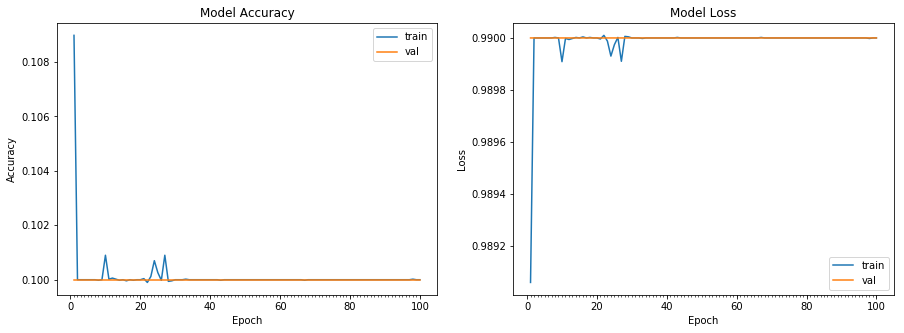

Accuracy on test data is: 10.00


In [62]:
model = cnn()
model.compile(optimizer='adam', loss='hinge', metrics=['accuracy'])
# train the model
start = time.time()
# Train the model
model_info = model.fit_generator(datagen.flow(train_features, train_labels, batch_size = 128),
                                 samples_per_epoch = train_features.shape[0], nb_epoch = 100, 
                                 validation_data = (test_features, test_labels), verbose=1)
end = time.time()
print ("Model took %0.2f seconds to train"%(end - start))
# plot model history
plot_model_history(model_info)
# compute test accuracy
print ("Accuracy on test data is: %0.2f"%accuracy(test_features, test_labels, model))

## Use hinge loss function and SGD on augmented data¶

Epoch 1/100
50000/50000 [==============================] - 56s - loss: 0.9900 - acc: 0.1001 - val_loss: 0.9900 - val_acc: 0.1031
Epoch 2/100
50000/50000 [==============================] - 55s - loss: 0.9899 - acc: 0.0984 - val_loss: 0.9900 - val_acc: 0.1000
Epoch 3/100
50000/50000 [==============================] - 55s - loss: 0.9899 - acc: 0.1022 - val_loss: 0.9899 - val_acc: 0.1000
Epoch 4/100
50000/50000 [==============================] - 55s - loss: 0.9898 - acc: 0.1014 - val_loss: 0.9898 - val_acc: 0.1000
Epoch 5/100
50000/50000 [==============================] - 55s - loss: 0.9895 - acc: 0.1017 - val_loss: 0.9892 - val_acc: 0.1000
Epoch 6/100
50000/50000 [==============================] - 55s - loss: 0.9890 - acc: 0.1000 - val_loss: 0.9887 - val_acc: 0.1000
Epoch 7/100
50000/50000 [==============================] - 55s - loss: 0.9885 - acc: 0.1003 - val_loss: 0.9879 - val_acc: 0.1002
Epoch 8/100
50000/50000 [==============================] - 54s - loss: 0.9875 - acc: 0.1033 - val

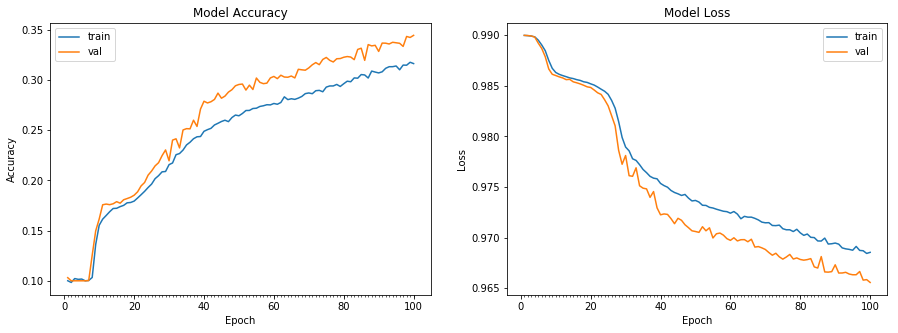

Model took 5501.13 seconds to train
Accuracy on test data is: 34.44


In [65]:
# Define the model
model = cnn()
sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
# Compile the model
model.compile(optimizer=sgd, loss='hinge', metrics=['accuracy'])
# Train the model
start = time.time()
model_info = model.fit_generator(datagen.flow(train_features, train_labels, batch_size = 128),
                                 samples_per_epoch = train_features.shape[0], nb_epoch = 100, 
                                 validation_data = (test_features, test_labels), verbose=1)
end = time.time()
# plot model history
plot_model_history(model_info)
print ("Model took %0.2f seconds to train"%(end - start))
# compute test accuracy
print ("Accuracy on test data is: %0.2f"%accuracy(test_features, test_labels, model))

## Use squaredhinge loss function and SGD on augmented data¶

Epoch 1/100
50000/50000 [==============================] - 56s - loss: 0.9810 - acc: 0.1002 - val_loss: 0.9810 - val_acc: 0.1124
Epoch 2/100
50000/50000 [==============================] - 54s - loss: 0.9810 - acc: 0.1006 - val_loss: 0.9809 - val_acc: 0.1005
Epoch 3/100
50000/50000 [==============================] - 55s - loss: 0.9809 - acc: 0.1015 - val_loss: 0.9809 - val_acc: 0.1001
Epoch 4/100
50000/50000 [==============================] - 54s - loss: 0.9809 - acc: 0.1029 - val_loss: 0.9808 - val_acc: 0.0999
Epoch 5/100
50000/50000 [==============================] - 55s - loss: 0.9807 - acc: 0.1012 - val_loss: 0.9806 - val_acc: 0.0998
Epoch 6/100
50000/50000 [==============================] - 55s - loss: 0.9805 - acc: 0.1014 - val_loss: 0.9803 - val_acc: 0.1010
Epoch 7/100
50000/50000 [==============================] - 54s - loss: 0.9802 - acc: 0.1012 - val_loss: 0.9799 - val_acc: 0.1166
Epoch 8/100
50000/50000 [==============================] - 55s - loss: 0.9795 - acc: 0.1060 - val

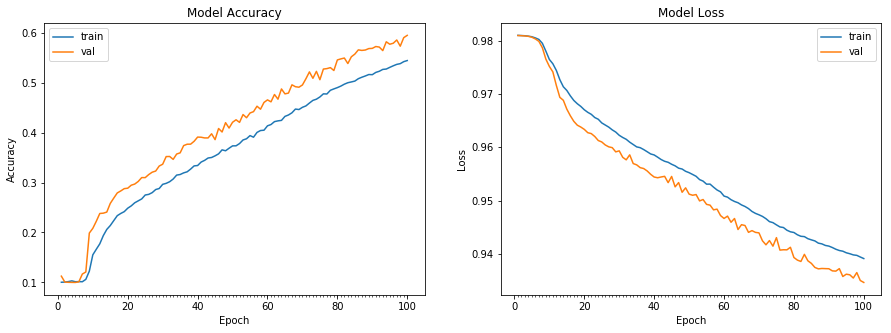

Model took 5527.88 seconds to train
Accuracy on test data is: 59.53


In [66]:
# Define the model
model = cnn()
sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
# Compile the model
model.compile(optimizer=sgd, loss='squared_hinge', metrics=['accuracy'])
# Train the model
start = time.time()
model_info = model.fit_generator(datagen.flow(train_features, train_labels, batch_size = 128),
                                 samples_per_epoch = train_features.shape[0], nb_epoch = 100, 
                                 validation_data = (test_features, test_labels), verbose=1)
end = time.time()
# plot model history
plot_model_history(model_info)
print ("Model took %0.2f seconds to train"%(end - start))
# compute test accuracy
print ("Accuracy on test data is: %0.2f"%accuracy(test_features, test_labels, model))